In [4]:
from region_utils.shapes import Circle, ConvexPolygon
from region_utils.region import Domain, Subdomain
import jax.numpy as np
import numpy as onp
import json

In [5]:
domain_points = np.asarray([[1, -2], [8, -2], [8, 2], [1, 2]])
Cylinder = Circle(center=np.array([3, 0]), radius=0.3, has_boundary=True)
OuterRectangle = ConvexPolygon(domain_points, list(range(4)))


#### Domain with matching dimensionality of problem in [Physics Informed Deep Learning (Part II):](https://arxiv.org/pdf/1711.10566.pdf) 

$x \in [1, 8]$, $y \in [-2, 2]$ ( $t \in [0, 19]$ )

Without subdomain decomposition (@JunmiaoHu)

In [6]:
subdomain0 = Subdomain([OuterRectangle], [Cylinder])
domain = Domain([subdomain0])

In [7]:
domain.create_boundary(100)
domain.create_interior(500, [1, -2], [8, 2])

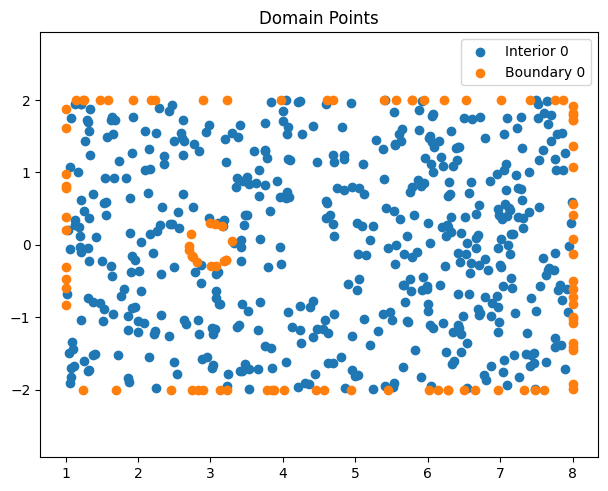

In [8]:
import matplotlib.pyplot as plt

plt.axis("equal")
# tight layout
plt.tight_layout()

domain.plot()

In [9]:
from utils import data_path

domain.write_to_file(data_path / "navier_stockes_pinn_train.json")

We need to add temporal dimention to data. As the code for generating 2d data is very
object oriented I suggest we do this manually with uglier ux

In [28]:
def add_temporal_dimention_training_data(input_file):
    str_rep = str(input_file)
    wo_suff = str_rep.removesuffix(".json")
    outfile = f"{wo_suff}_w_temporal.json"
    with open(input_file, "r") as infile:
        data = json.load(infile)
        for p in data['XPINNs']:
            for point in p['Internal points']:
                point.append(float(onp.random.uniform(0, 19)))
            for point in p['Boundary points']:
                point.append(float(onp.random.uniform(0, 19)))
                
        for s in data['Interfaces']:
            for point in s['Points']:
                point.append(float(onp.random.uniform(0, 19)))
                
    with open(outfile, "w") as outfile:
        json.dump(data, outfile)

Sanity check on XPINN_template

In [31]:
file = data_path / "XPINN_template.json"
add_temporal_dimention_training_data(file)

outfile = data_path / "XPINN_template_w_temporal.json"
with open(outfile, "r") as infile:
        data = json.load(infile)
        print(data)

{'XPINNs': [{'Internal points': [[0.5, 0.5, 7.8477044849951705], [0.7, 0.6, 15.668697885434035], [0.8, 0.9, 7.575826006679102]], 'Boundary points': [[0, 0, 3.105237618202299], [1, 0, 8.034672042346248], [0.5, 0, 18.806558240307222]]}, {'Internal points': [[0.5, 1.5, 16.068442698574177], [0.7, 1.6, 4.303270041959954], [0.8, 1.9, 12.07787154391208]], 'Boundary points': [[1, 2, 11.70859192797203], [1.5, 2, 15.24055325513326], [0.5, 2, 4.318793879390422]]}], 'Interfaces': [{'XPINNs': [0, 1], 'Points': [[1, 1, 1.9726781929214168], [0.2, 1, 17.379993193056134], [1.5, 1, 11.193985713994572]]}]}


In [32]:
file = data_path / "navier_stockes_pinn_train.json"
add_temporal_dimention_training_data(file)